# 主成分分析算法的实现

In [2]:
import numpy as np
class Priceipal_Component_Analysis:
    def fit(self, data, dim):
        # data normalization
        mean_values = np.mean(data,axis=0)
        data_centered = data - mean_values
        # calculate cov
        data_cov = np.cov(data_centered,rowvar=0)
        # eigen-decomposition
        eig_values, eig_vects = np.linalg.eig(data_cov)
        # sort eig_values
        eig_values_sorted = np.argsort(-eig_values)
        #select biggest dim eigvalues
        top_dim_index = eig_values_sorted[:dim]
        # select top dim eig vectors
        top_dim_vects = eig_vects[:,top_dim_index]
        self.w = top_dim_vects
    def transform(self,data):
        # data normalization
        mean_values = np.mean(data,axis=0)
        data_centered = data - mean_values
        data_low = np.dot(data_centered,self.w)
        return data_low
    def fit_transform(self,data,dim):
        # data normalization
        mean_values = np.mean(data,axis=0)
        data_centered = data - mean_values
        # calculate cov
        data_cov = np.cov(data_centered,rowvar=0)
        # eigen-decomposition
        eig_values, eig_vects = np.linalg.eig(data_cov)
        # sort eig_values
        eig_values_sorted = np.argsort(-eig_values)
        #select biggest dim eigvalues
        top_dim_index = eig_values_sorted[:dim]
        # select top dim eig vectors
        top_dim_vects = eig_vects[:,top_dim_index]
        self.w = top_dim_vects
        data_low = np.dot(data_centered,self.w)
        return data_low


# 实践案例一 ：基于PCA的乳腺癌数据降维

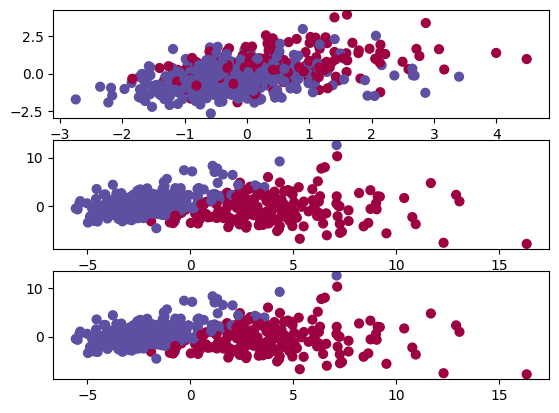

In [4]:
#读取数据
from sklearn.datasets import load_breast_cancer
cancer_data = load_breast_cancer()
data = cancer_data['data']#feature space
y = cancer_data['target']#label space
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data = scaler.fit_transform(data) # data normalization
#数据可视化
# create figures
import matplotlib.pyplot as plt
fig = plt.figure()
ax1 = fig.add_subplot(311)
ax2 = fig.add_subplot(312)
ax3 = fig.add_subplot(313)
#show original data
x1 = np.argwhere(cancer_data['feature_names']=='mean symmetry')[0][0]
x2 = np.argwhere(cancer_data['feature_names']=='worst smoothness')[0][0]
x = data[:,[x1,x2]]
ax1.scatter(x[:,0],x[:,1],c=y,s=40,cmap=plt.cm.Spectral)
#PCA降维
# do PCA tranformation
pca = Priceipal_Component_Analysis()
data_low = pca.fit_transform(data,dim=2)
# show low dimension PCA data
ax2.scatter(data_low[:,0],data_low[:,1],c=y,s=40,cmap=plt.cm.Spectral)

# do PCA using sklearn
from sklearn.decomposition import PCA
pca_sklearn = PCA(n_components=2)
reduced_data = pca_sklearn.fit_transform(data)
ax3.scatter(reduced_data[:,0],reduced_data[:,1],c=y,s=40,cmap=plt.cm.Spectral)


# MDS算法的实现

In [5]:
import numpy as np
class Multiple_Dimensional_Scaling:
    def euclidean_dist(self,x1,x2):
        dist = np.linalg.norm(x1-x2)
        return dist
    def get_dist_matrix(self,data):
        num = data.shape[0]
        dist_matrix = np.zeros((num,num),dtype=float)
        for i in range(num):
            for j in range(num):
                dist_matrix[i,j]=self.euclidean_dist(data[i], data[j])
        return dist_matrix
    def get_inner_prod_matrix(self,dist_matrix):
        D_square = np.square(dist_matrix)
        D_sum = np.sum(D_square,axis=1)/D_square.shape[0]
        D_i = np.repeat(D_sum[:,np.newaxis], dist_matrix.shape[0],axis=1)
        D_j = np.repeat(D_sum[np.newaxis,:], dist_matrix.shape[0],axis=0)
        D_ij = np.sum(D_square)/((dist_matrix.shape[0])**2)*np.ones([dist_matrix
                                                                     .shape[0],dist_matrix.shape[0]])
        inner_prod_matrix = (D_i + D_j - D_square - D_ij)/2
        return inner_prod_matrix
    def fit(self,data, low_dim =2):
        D = self.get_dist_matrix(data)
        B = self.get_inner_prod_matrix(D)
        eig_values, eig_vects = np.linalg.eigh(B)
        eig_values_sort = np.argsort(-eig_values)
        values_sort = eig_values[eig_values_sort]
        vects_sort = eig_vects[:,eig_values_sort]
        top_value_diag = np.diag(values_sort[0:low_dim])
        top_vects = vects_sort[:,0:low_dim]
        Z = np.dot(np.sqrt(top_value_diag),top_vects.T).T
        return Z



# 实践案例二：基于MDS算法的数据降维

/Users/pengyuyan/PSH/Machine_learning_basics/venv/lib/python3.9/site-packages/sklearn/manifold/_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


Text(0.5, 1.0, ' after MDS in sklearn')

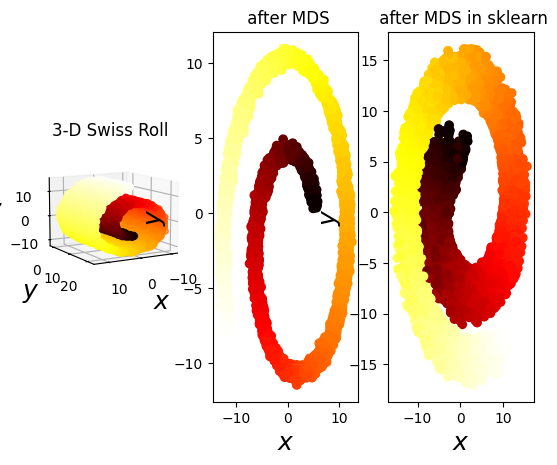

In [7]:
#读取数据
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d as p3d
from sklearn.manifold import MDS
from sklearn.datasets import make_swiss_roll
X, y = make_swiss_roll(n_samples=5000,noise=0.2,random_state=42)
#降维
mds = Multiple_Dimensional_Scaling()
Z = mds.fit(X,low_dim=2)

mds_sklearn = MDS(n_components=2,metric=True)
X_mds = mds_sklearn.fit_transform(X)
#比较降维结果
axes =[-11.5,14,-2,23,-12,15]
fig = plt.figure()
ax1 = fig.add_subplot(131,projection="3d")
ax1.scatter(X[:,0],X[:,1],X[:,2],c=y,cmap=plt.cm.hot)
ax1.view_init(10,60)
ax1.set_xlabel("$x$",fontsize=18)
ax1.set_ylabel("$y$",fontsize=18)
ax1.set_zlabel("$z$",fontsize=18)
ax1.set_xlim(axes[0:2])
ax1.set_ylim(axes[2:4])
ax1.set_zlim(axes[4:6])
plt.title("3-D Swiss Roll")
ax2 = fig.add_subplot(132)
ax2.scatter(Z[:,0],Z[:,1],c=y,cmap=plt.cm.hot)
ax2.set_xlabel("$x$",fontsize=18)
ax2.set_ylabel("$y$",fontsize=18)
plt.title(" after MDS")
ax3 = fig.add_subplot(133)
ax3.scatter(X_mds[:,0],X_mds[:,1],c=y,cmap=plt.cm.hot)
ax3.set_xlabel("$x$",fontsize=18)
ax3.set_ylabel("$y$",fontsize=18)
plt.title(" after MDS in sklearn")